**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

* **EQUIPO: 6**
* NOMBRE: ALEJANDRO ELÍ ACOSTA FLORES
* MATRÍCULA: ----------------------------------------------------

* NOMBRE: JUAN CARLOS CRUZ MARTÍNEZ
* MATRÍCULA: ----------------------------------------------------

* NOMBRE: JAVIER MEJÍA MEDRANO
* MATRÍCULA: A01100896

* NOMBRE: JOSÉ LUIS LORENZO AUGUSTO GALÍNDEZ VENCES
* MATRÍCULA: A01105695



In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import os
DIR = "/content/drive/MyDrive/Maestría Inteligencia Artifical Aplicada/Ciencia y Analítica de Datos/Colab Notebooks & Data Sets/Actividad6FE"
os.chdir(DIR)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [56]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [57]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a) Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [58]:
# Eliminamos columnas que no serán relevantes para el análisis.
cars_df.drop(columns=['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long'], inplace=True)

# Mostramos el resumen del DataFrame para confirmar la eliminación de columnas
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  county        0 non-null       float64
 17  state         426880 non-null  object 
dtypes: f

**Comentarios:** Las columnas eliminadas contienen información redundante, irrelevante para el análisis de variables, o datos textuales como descripciones e imágenes que no usaremos.
* `id` y `VIN` son identificadores únicos que no tienen valor predictivo directo.
* `url`, `image_url` y `description` son campos textuales o enlaces que al parecer no vamos a analizar
* `posting_date`, aunque podría ser útil para análisis temporal, parece no ser central para esta actividad enfocada en transformación de variables.
* `lat` y `long` aunque podrían ser útiles para geolocalización, parece que no haremos un análisis espacial.


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [59]:
# Guardamos la cantidad de registros (filas) en una variable
num_observations = cars_df.shape[0]
print(f"Número de registros (filas): {num_observations}")

# Guardamos la cantidad de columnas (características) en otra variable
num_columns = cars_df.shape[1]
print(f"Número de columnas (características): {num_columns}")

Número de registros (filas): 426880
Número de columnas (características): 18


**Comentarios:**
* `cars_df.shape[0]` nos da el número de filas del DataFrame (observaciones o registros)
* `cars_df.shape[1]` nos da el número de columnas del DataFrame (variables o características)

## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [60]:
# Calculamos el porcentaje de valores nulos por columna
missing_percentages = cars_df.isnull().mean()*100
print(f"Porcentaje de valores nulos por columna: {missing_percentages}")

# Calculamos el número mínimo de valores no nulos que debe tener una columna para conservarse (70% del total de registros)
min_threshold = int(0.70 * num_observations)

# Guardamos el número de columnas antes de eliminar
columns_before = num_columns

# Eliminamos columnas con 30% o más de valores faltantes
cars_df = cars_df.dropna(axis=1, thresh=min_threshold)

# Actualizamos el número total de columnas tras eliminar las incompletas
num_columns = cars_df.shape[1]

# Calculamos cuántas columnas fueron eliminadas
columns_dropped = columns_before - num_columns

# Mostramos el total de columnas eliminadas
print(f"\nColumnas eliminadas: {columns_dropped}")

Porcentaje de valores nulos por columna: region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
dtype: float64

Columnas eliminadas: 6


**Comentarios:**
* Calculamos el umbral del `70%` con base en el número total de registros `num_observations` para determinar qué columnas conservar.
* Utilizamos la función `dropna` con el parámetro `thresh=min_threshold` para eliminar columnas con `30%` o más de valores nulos.
* Como resultado, se eliminaron `6 columnas` del DataFrame por no cumplir con el umbral de completitud requerido.

Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [61]:
# Calculamos nuevamente el porcentaje de valores nulos por columna
missing_percentages = cars_df.isnull().mean() * 100
print(f"Porcentaje de valores nulos por columna:\n{missing_percentages}")

# Identificamos columnas con menos del 5% de valores nulos
low_missing_cols = missing_percentages[missing_percentages < 5].index.tolist()

# Guardamos el número de registros antes de eliminar
rows_before = num_observations

# Eliminamos filas que tengan valores nulos en esas columnas específicas
cars_df = cars_df.dropna(subset=low_missing_cols)

# Actualizamos el número de registros después del borrado
num_observations = cars_df.shape[0]

# Calculamos cuántos registros fueron eliminados y su porcentaje
rows_dropped = rows_before - num_observations
percent_dropped = (rows_dropped / rows_before) * 100

# Mostramos el resultado
print(f"\nRegistros eliminados: {rows_dropped}")
print(f"Porcentaje de registros eliminados: {percent_dropped:.2f}%")


Porcentaje de valores nulos por columna:
region           0.000000
region_url       0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
type            21.752717
state            0.000000
dtype: float64

Registros eliminados: 37276
Porcentaje de registros eliminados: 8.73%


Comentarios:
* Calculamos el porcentaje de valores nulos por columna para identificar cuáles tienen menos del **5%** de valores faltantes.
* Utilizamos la función `dropna` con el parámetro `subset=low_missing_cols` para eliminar únicamente las filas que tienen nulos en esas columnas específicas.
* Como resultado, se eliminaron **37,276 registros**, lo cual representa un **8.73% del total original**. Esta eliminación fue selectiva y tuvo un impacto controlado en el tamaño del conjunto de datos.

2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [62]:
# Calculamos el número de valores nulos por columna
missing_values = cars_df.isnull().sum()
print("Valores nulos por columna antes de la imputación:\n", missing_values[missing_values > 0])

# Separación de columnas por tipo
numeric_cols = cars_df.select_dtypes(include=['number']).columns
categorical_cols = cars_df.select_dtypes(include=['object']).columns

# Inicializamos contadores para proporcionar el número de imputaciones por cada método aplicado
mean_imputed = 0
median_imputed = 0
mode_imputed = 0

# Imputación para columnas numéricas
for col in numeric_cols:
    if cars_df[col].isnull().sum() > 0:
        if cars_df[col].max() > cars_df[col].median() * 2:
            # Usamos mediana para columnas con posible sesgo o valores extremos
            value = cars_df[col].median()
            method = "mediana"
            median_imputed += 1
        else:
            # Usamos media cuando no hay sesgo evidente
            value = cars_df[col].mean()
            method = "media"
            mean_imputed += 1
        cars_df[col] = cars_df[col].fillna(value)
        print(f"Imputamos '{col}' con su {method}: {value:.2f}")

# Imputación para columnas categóricas
for col in categorical_cols:
    if cars_df[col].isnull().sum() > 0:
        mode_value = cars_df[col].mode()[0]
        cars_df[col] = cars_df[col].fillna(mode_value)
        mode_imputed += 1
        print(f"Imputamos '{col}' con su moda: {mode_value}")

# Mostramos resumen final de imputaciones
print(f"\nColumnas numéricas imputadas con media: {mean_imputed}")
print(f"Columnas numéricas imputadas con mediana: {median_imputed}")
print(f"Columnas categóricas imputadas con moda: {mode_imputed}")


Valores nulos por columna antes de la imputación:
 type    82628
dtype: int64
Imputamos 'type' con su moda: sedan

Columnas numéricas imputadas con media: 0
Columnas numéricas imputadas con mediana: 0
Columnas categóricas imputadas con moda: 1


**Comentarios:**
* Utilizamos **la mediana para variables numéricas con valores extremos** (cuando el máximo era más del doble de la mediana), ya que este método es más robusto ante outliers.
* Utilizamos **la media en variables numéricas sin sesgos aparentes**, asumiendo una distribución más simétrica.
* Utilizamos **la moda para variables categóricas**, ya que refleja la categoría más frecuente y conserva la coherencia semántica de los datos.

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

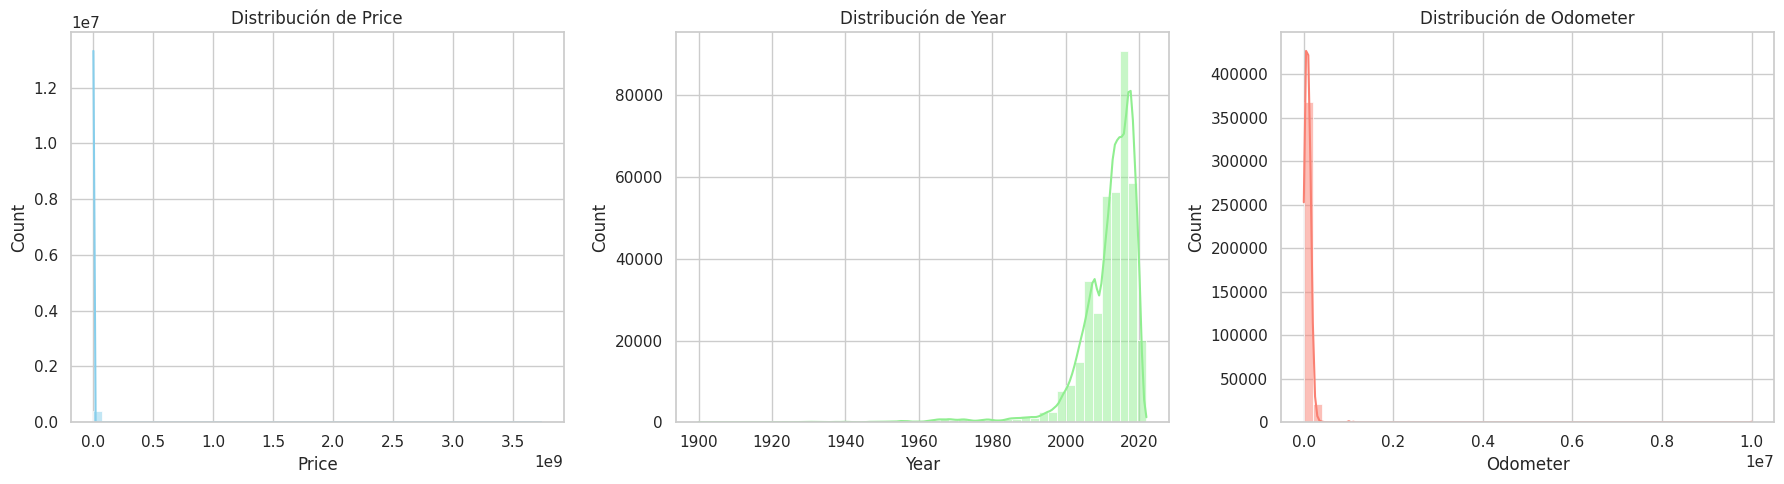

In [63]:
# Definimos estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# Histograma de 'price'
plt.subplot(1, 3, 1)
sns.histplot(cars_df['price'], bins=50, kde=True, color='skyblue')
plt.title("Distribución de Price")
plt.xlabel("Price")

# Histograma de 'year'
plt.subplot(1, 3, 2)
sns.histplot(cars_df['year'], bins=50, kde=True, color='lightgreen')
plt.title("Distribución de Year")
plt.xlabel("Year")

# Histograma de 'odometer'
plt.subplot(1, 3, 3)
sns.histplot(cars_df['odometer'], bins=50, kde=True, color='salmon')
plt.title("Distribución de Odometer")
plt.xlabel("Odometer")

plt.tight_layout()
plt.show()


**Observaciones:**
* **Price:** Hay una concentración muy alta de valores bajos, seguida de una cola larga hacia la derecha con valores altos. Esto es típico de una distribución sesgada positivamente. *Los valores extremadamente altos podrían ser errores o casos poco representativos. Por ejemplo, autos exóticos, errores de entrada como precios millonarios.*
* **Year:** La mayoría de los registros se concentran a partir del año 2000. *Hay valores muy antiguos hasta antes de 1950, que podrían representar errores o autos coleccionables pero poco comunes.*
* **Odometer:** Muestra sesgo positivo marcado, con muchos autos en los primeros kilómetros y una larga cola hacia valores altos. *Algunos valores probablemente representan errores o unidades no estandarizadas. Por ejemplo, odómetros reseteados o registrados en metros.*

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [64]:
from datetime import datetime

# Calculamos el año actual
current_year = datetime.now().year

# Creamos la columna 'age' a partir de 'year'
cars_df['age'] = current_year - cars_df['year']

# Eliminamos la columna original 'year'
cars_df.drop(columns='year', inplace=True)


**Comentarios:**
* Calculamos `age` usando el año actual `datetime.now().year`, lo cual nos permite mantener este análisis actualizado automáticamente.
* Eliminamos `year` porque ya no la necesitamos como variable original una vez que hemos obtenido `age`.

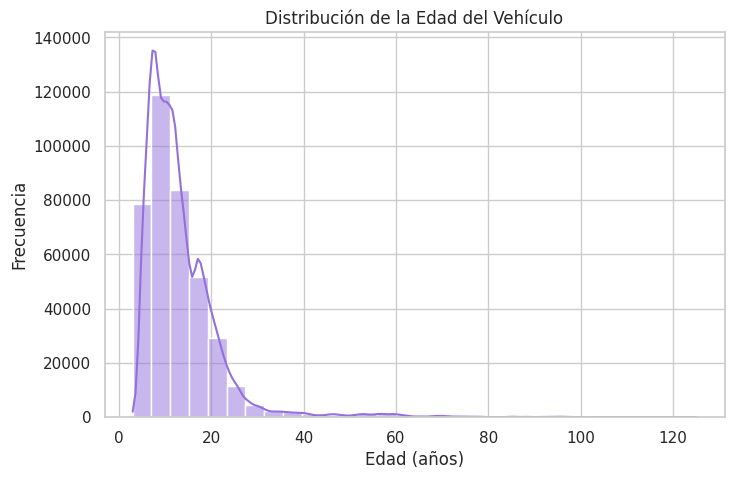

In [65]:
# Graficamos el histograma de la variable 'age'
plt.figure(figsize=(8, 5))
sns.histplot(cars_df['age'], bins=30, kde=True, color='mediumpurple')
plt.title("Distribución de la Edad del Vehículo")
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

**Observaciones:**
* **Age**: La mayoría de los vehículos tienen entre 0 y 20 años, con una concentración fuerte entre 5 y 15 años. La distribución es sesgada positivamente, con una cola larga hacia la derecha. Hay autos con más de 50 o incluso 100 años, que podrían representar errores, autos históricos o casos muy poco frecuentes.

* **Year vs. Age**: Mientras que `year` se concentra en fechas recientes de 2000 a 2022, `age` lo hace en rangos bajos de 0 a 20 años. **La variable age facilita la interpretación directa de la antigüedad del vehículo**, lo que la hace más útil para análisis y segmentación.

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

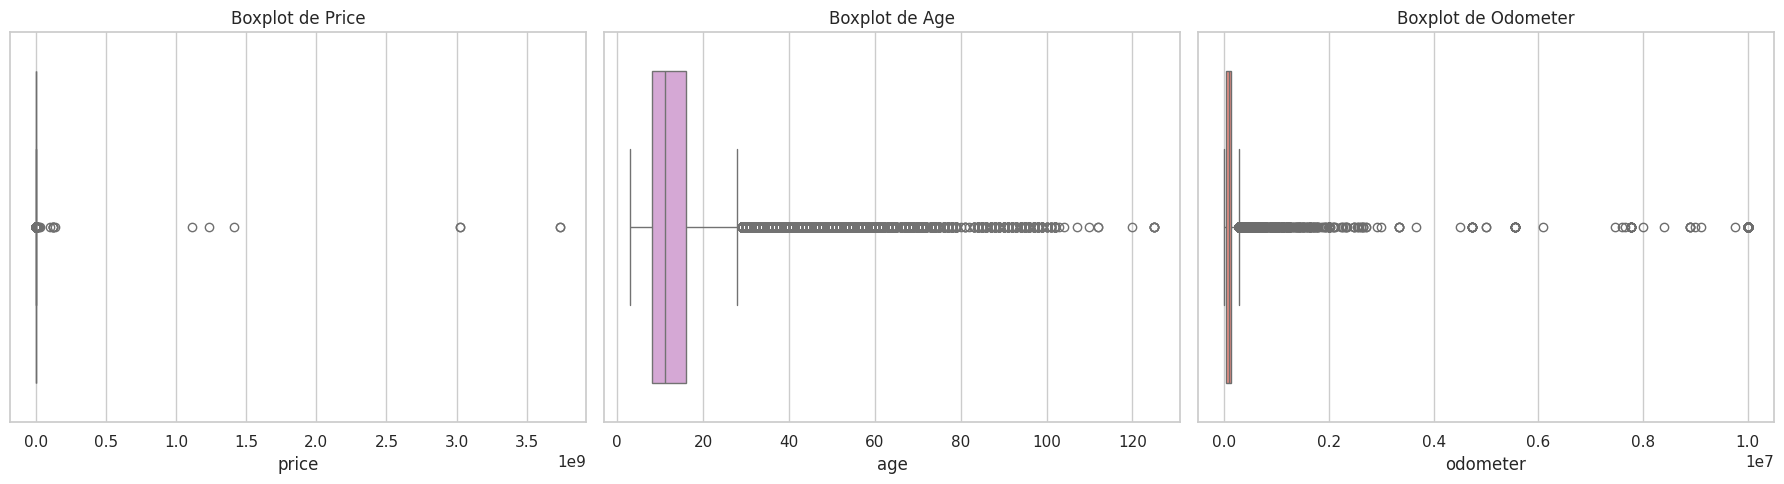

In [66]:
# Definimos el estilo visual
sns.set(style="whitegrid")

# Creamos la figura y los 3 boxplots
plt.figure(figsize=(18, 5))

# Boxplot de 'price'
plt.subplot(1, 3, 1)
sns.boxplot(x=cars_df['price'], color='skyblue')
plt.title("Boxplot de Price")

# Boxplot de 'age'
plt.subplot(1, 3, 2)
sns.boxplot(x=cars_df['age'], color='plum')
plt.title("Boxplot de Age")

# Boxplot de 'odometer'
plt.subplot(1, 3, 3)
sns.boxplot(x=cars_df['odometer'], color='salmon')
plt.title("Boxplot de Odometer")

plt.tight_layout()
plt.show()


**Observaciones:**
* **Price:** Observamos numerosos valores atípicos hacia la derecha, incluyendo algunos extremadamente altos que superan con mucho los límites normales del mercado. *Esto confirma la presencia de precios irreales o errores de registro. Por ejemplo, montos millonarios.*
* **Age:** Hay varios valores atípicos en vehículos con más de 50 años de antigüedad. *Aunque algunos podrían ser autos clásicos, también podrían representar errores o casos excepcionales que afectan la distribución.*
* **Odometer:** Detectamos múltiples outliers en rangos altos de kilometraje. *Algunos vehículos presentan valores muy por encima del umbral típico, lo que puede indicar errores de entrada o vehiculos de usos atípicos. Por ejemplo, tranporte público.*

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [67]:
# Guardamos el número original de registros antes de eliminar outliers para poder contestar la respuesta
initial_rows = num_observations

# Variables a analizar
variables = ['price', 'age', 'odometer']

# Diccionario para guardar índices de outliers por variable
outlier_indices = {}

# Calculamos outliers con método IQR para cada variable
for col in variables:
    Q1 = cars_df[col].quantile(0.25)
    Q3 = cars_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificamos índices de los valores atípicos
    outliers = cars_df[(cars_df[col] < lower_bound) | (cars_df[col] > upper_bound)]
    outlier_indices[col] = outliers.index

    # Calculamos porcentaje de outliers para esa variable
    outlier_pct = (len(outliers) / num_observations) * 100
    print(f"Outliers en '{col}': {len(outliers)} registros ({outlier_pct:.2f}%)")

# Combinamos todos los índices de outliers únicos (sin repetir)
all_outlier_indices = set().union(*outlier_indices.values())

# Eliminamos los registros con al menos un valor atípico
cars_df = cars_df.drop(index=all_outlier_indices)

# Actualizamos el número total de registros
num_observations = cars_df.shape[0]

# Calculamos porcentaje total de registros eliminados
total_dropped = initial_rows - num_observations
percent_total_dropped = (total_dropped / initial_rows) * 100

# Mostramos el resultado final
print(f"\nRegistros eliminados en total por outliers: {total_dropped}")
print(f"Porcentaje de registros eliminados respecto al total original: {percent_total_dropped:.2f}%")


Outliers en 'price': 6656 registros (1.71%)
Outliers en 'age': 14209 registros (3.65%)
Outliers en 'odometer': 3226 registros (0.83%)

Registros eliminados en total por outliers: 23276
Porcentaje de registros eliminados respecto al total original: 5.97%


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

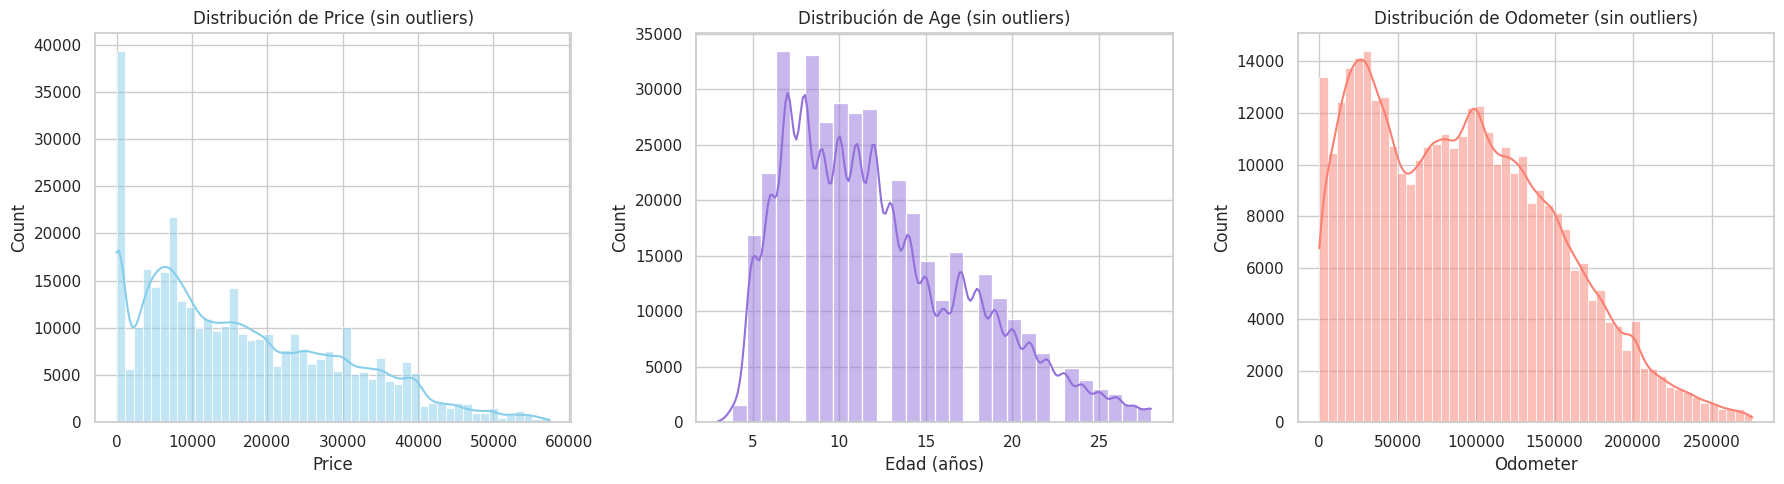

In [68]:
# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# Histograma de 'price'
plt.subplot(1, 3, 1)
sns.histplot(cars_df['price'], bins=50, kde=True, color='skyblue')
plt.title("Distribución de Price (sin outliers)")
plt.xlabel("Price")

# Histograma de 'age'
plt.subplot(1, 3, 2)
sns.histplot(cars_df['age'], bins=30, kde=True, color='mediumpurple')
plt.title("Distribución de Age (sin outliers)")
plt.xlabel("Edad (años)")

# Histograma de 'odometer'
plt.subplot(1, 3, 3)
sns.histplot(cars_df['odometer'], bins=50, kde=True, color='salmon')
plt.title("Distribución de Odometer (sin outliers)")
plt.xlabel("Odometer")

plt.tight_layout()
plt.show()


**Observaciones:**
* **Price:** La distribución muestra una reducción significativa en los valores extremos, aunque persiste un sesgo positivo. La mayoría de los vehículos se concentran en rangos de precios bajos, con una cola extendida hacia precios más altos.
* **Age:** La distribución de la antigüedad de los vehículos es más simétrica después de eliminar los outliers. La mayoría de los autos tienen entre 5 y 15 años.
* **Odometer:** Aunque se han eliminado los valores extremos, la distribución del odómetro aún presenta un sesgo positivo. La mayoría de los vehículos tienen kilometrajes bajos, pero existe una cola hacia valores más altos.

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


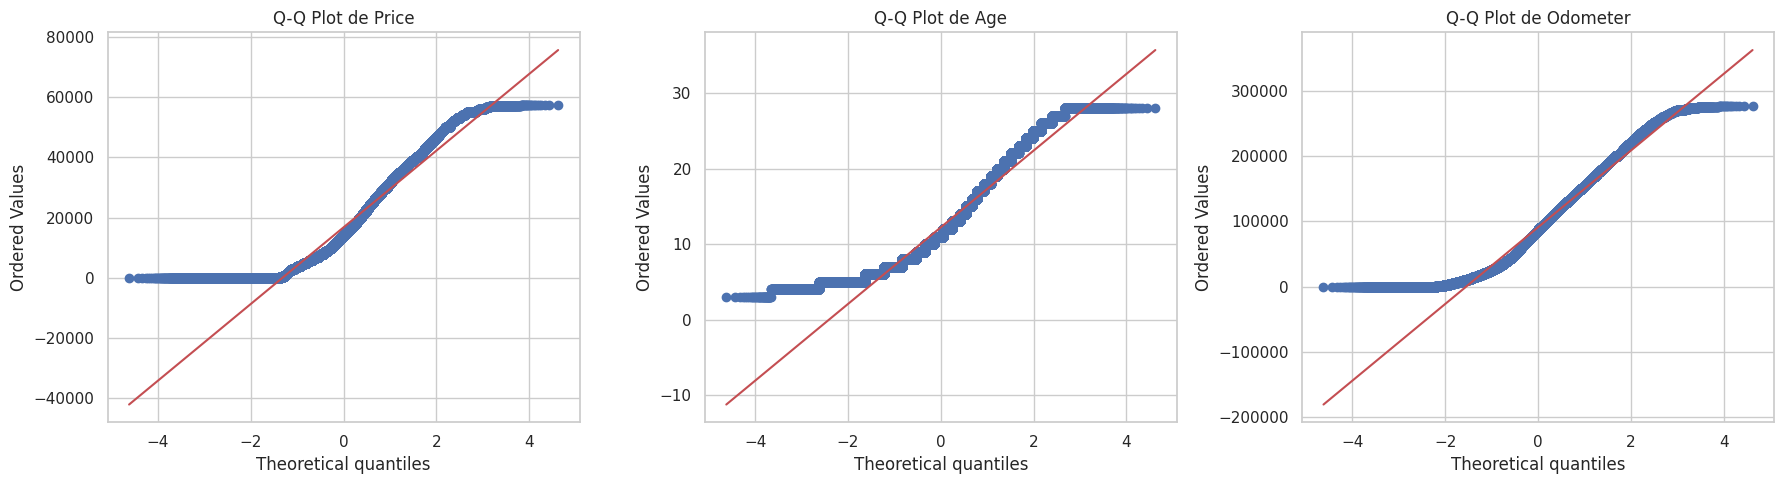

In [69]:
# Creamos figura para los Q-Q plots
plt.figure(figsize=(18, 5))

# Q-Q plot para 'price'
plt.subplot(1, 3, 1)
stats.probplot(cars_df['price'], dist="norm", plot=plt)
plt.title("Q-Q Plot de Price")

# Q-Q plot para 'age'
plt.subplot(1, 3, 2)
stats.probplot(cars_df['age'], dist="norm", plot=plt)
plt.title("Q-Q Plot de Age")

# Q-Q plot para 'odometer'
plt.subplot(1, 3, 3)
stats.probplot(cars_df['odometer'], dist="norm", plot=plt)
plt.title("Q-Q Plot de Odometer")

plt.tight_layout()
plt.show()


**Observaciones:**
* **Price:** Los puntos se desvían notablemente en las colas inferior y superior, con una curvatura en forma de “S” marcada. Esto indica un sesgo positivo fuerte y una distribución claramente no normal. Se recomienda aplicar una transformación para acercarse a la normalidad.

* **Age**: Aunque no se ajusta perfectamente, age muestra una alineación más razonable con la diagonal central, especialmente en los cuantiles intermedios. Hay desviaciones leves en los extremos, pero en general es la variable que más se aproxima a una distribución normal. No es claro si require una transformación.

* **Odometer:** Presenta una forma muy similar a price, con una fuerte curvatura que indica asimetría positiva. La distribución se aleja claramente de la normal, por lo que también se sugiere aplicar una transformación antes del escalamiento.

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [72]:
from sklearn.preprocessing import PowerTransformer

# Variables a transformar
vars_to_transform = ['price', 'odometer', 'age']

# Inicializamos el transformador Yeo-Johnson sin estandarizar
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Aplicamos la transformación
transformed_data = pt.fit_transform(cars_df[vars_to_transform])

# Creamos un nuevo DataFrame con los resultados
transf_df = pd.DataFrame(transformed_data, columns=[f"{col}_yj" for col in vars_to_transform])

# Vista previa del DataFrame transformado
print(transf_df.head())

     price_yj  odometer_yj    age_yj
0  194.933364   623.675987  2.322289
1  164.326657   695.994731  2.571180
2  209.204110   346.526341  1.706149
3  188.293578   519.996769  2.069421
4  137.708592   949.705360  2.391936


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

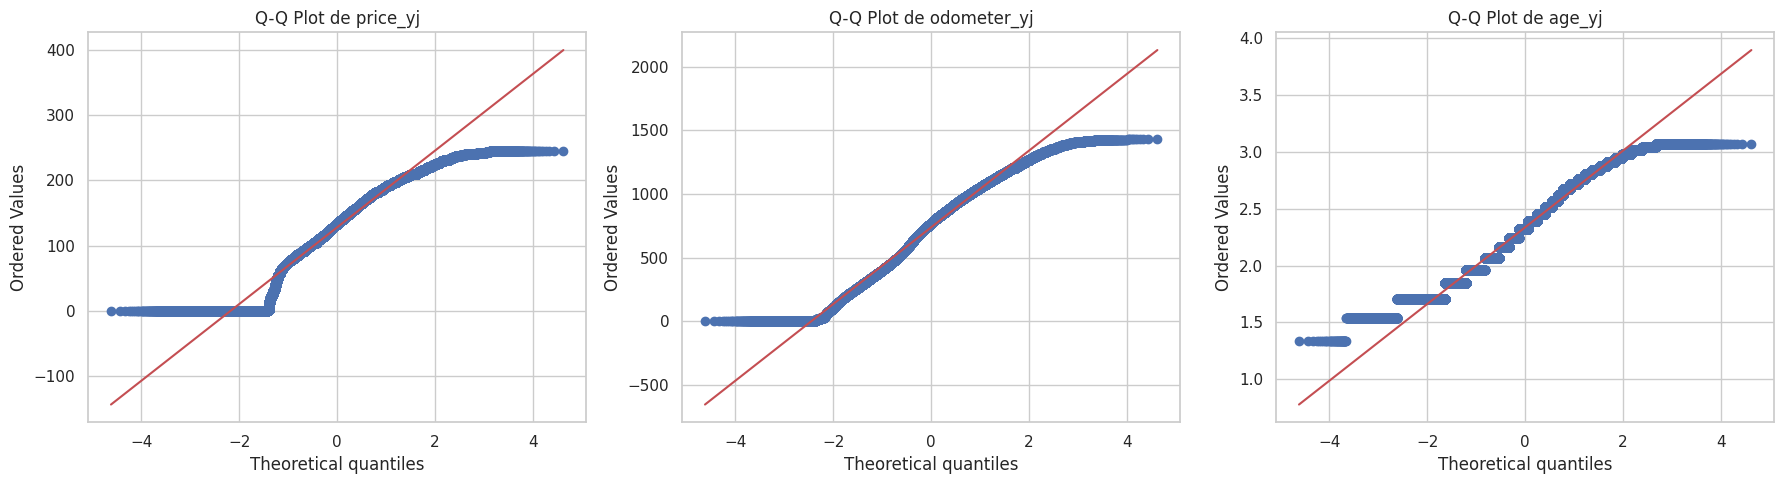

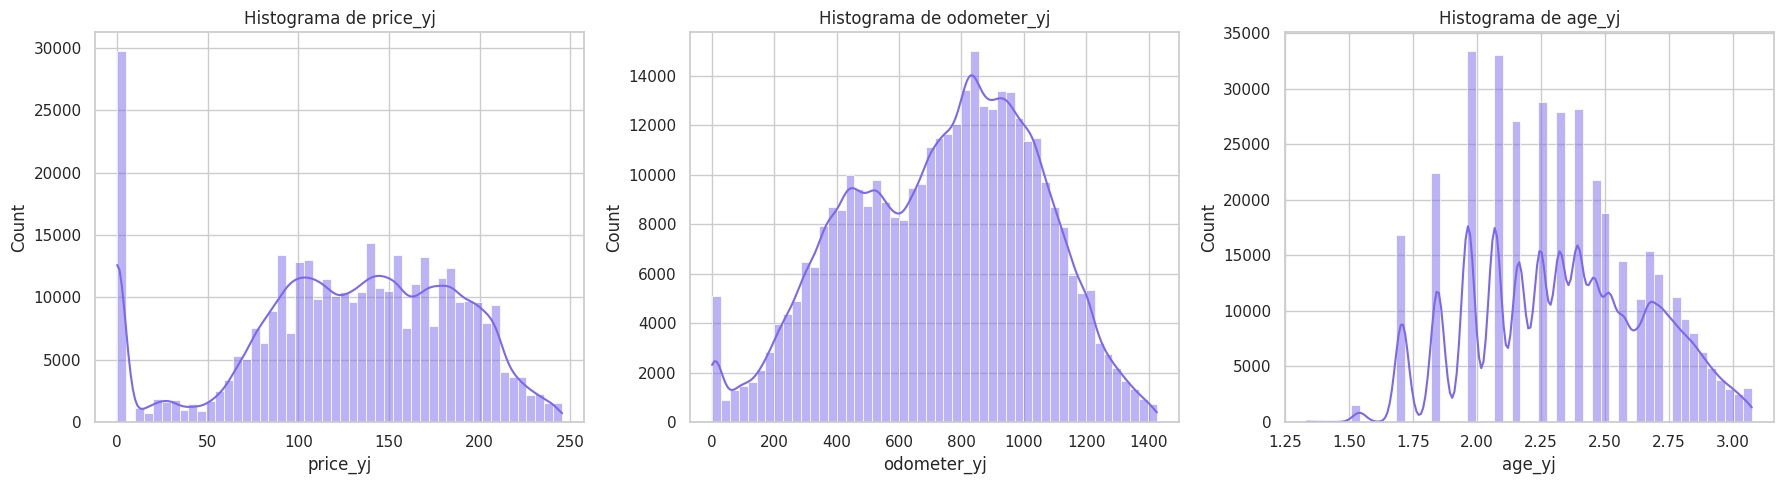

In [74]:
# Gráficos Q-Q
plt.figure(figsize=(18, 5))
for i, col in enumerate(transf_df.columns):
    plt.subplot(1, 3, i+1)
    stats.probplot(transf_df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot de {col}")
plt.tight_layout()
plt.show()

# Histogramas
plt.figure(figsize=(18, 5))
for i, col in enumerate(transf_df.columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(transf_df[col], bins=50, kde=True, color='mediumslateblue')
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()


**Observaciones:**
* **price_yj:**
 * El Q-Q muestra una mejora significativa respecto al original, aunque persisten desviaciones en ambas colas. La forma general se acerca más a la diagonal, lo que indica reducción del sesgo.
 * El histograma ahora presenta una distribución más simétrica y multimodal, aunque se mantiene cierta concentración cerca del cero. La transformación suavizó el sesgo positivo.

* **odometer_yj:**
 * El Q-Q plot muestra una alineación más cercana a la normal, especialmente en los cuantiles centrales. Las colas aún se desvían ligeramente, pero el patrón es más lineal que antes.
 * El histograma revela una distribución menos sesgada, con mayor simetría en comparación con la versión original. La transformación fue efectiva para "desinclinar" la variable.

* **age_yj:**
 * El Q-Q plot muestra alineación moderada con la diagonal, aunque con pequeñas irregularidades. Esto es esperable ya que age originalmente tenía una distribución cercana a la normal.
 * El histograma mantiene asimetría moderada, pero con una forma más continua. La transformación tuvo un efecto sutil pero positivo en la suavización de la distribución.

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [75]:
from sklearn.preprocessing import MinMaxScaler

# Inicializamos el escalador Min-Max
minmax_scaler = MinMaxScaler()

# Aplicamos el escalado a las variables transformadas
minmax_scaled = minmax_scaler.fit_transform(transf_df)

# Creamos un nuevo DataFrame con los valores escalados
minmax_df = pd.DataFrame(minmax_scaled, columns=[f"{col}_mm" for col in transf_df.columns])

# Mostramos una vista previa del DataFrame escalado
print(minmax_df.head())


   price_yj_mm  odometer_yj_mm  age_yj_mm
0     0.794060        0.437060   0.568026
1     0.669384        0.487739   0.711175
2     0.852192        0.242839   0.213656
3     0.767013        0.364403   0.422590
4     0.560956        0.665534   0.608083


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

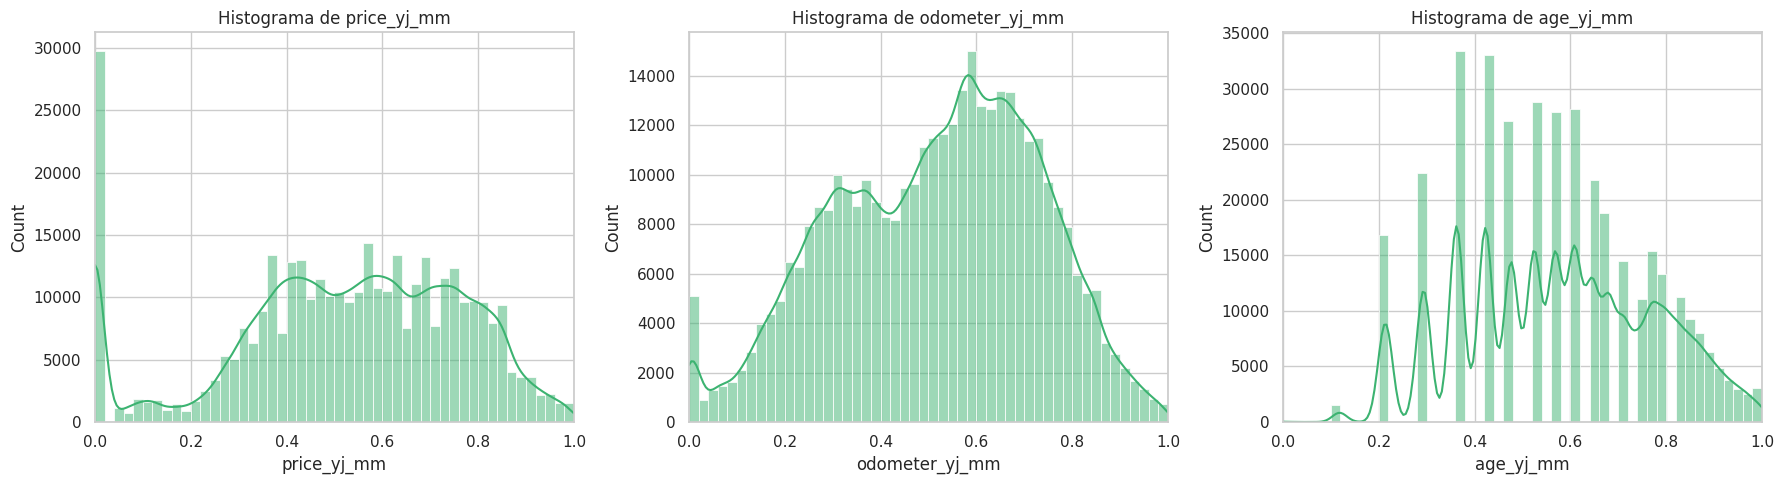

In [76]:
# Estilo visual
sns.set(style="whitegrid")

# Creamos los histogramas para las variables escaladas
plt.figure(figsize=(18, 5))

for i, col in enumerate(minmax_df.columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(minmax_df[col], bins=50, kde=True, color='mediumseagreen')
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.xlim(0, 1)

plt.tight_layout()
plt.show()


**Observaciones:**
* **price_yj_mm:** La distribución conserva su forma general tras la transformación y el escalamiento. Se mantiene la asimetría con mayor concentración en valores bajos, aunque ahora todos los valores están contenidos entre 0 y 1. La curva de densidad confirma que el escalamiento no alteró la estructura original.

* **odometer_yj_mm:** La forma suavizada de la variable transformada se preserva correctamente. Se observa una distribución ligeramente bimodal, centrada alrededor de valores medios, lo cual indica que el escalamiento respeta la densidad relativa de los datos.

* **age_yj_mm:** La variable mantiene su patrón ondulado y asimétrico tras el escalado. Aunque la densidad presenta irregularidades, el comportamiento es coherente con la transformación previa y no se ha perdido información estructural relevante.

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.